In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [21]:
df = pd.read_csv("../data/data_cleaning.csv")

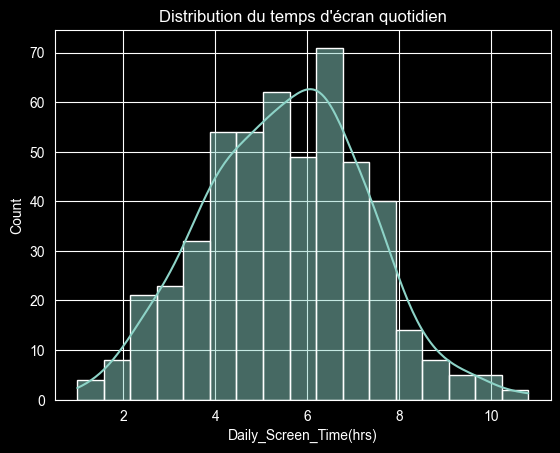

In [22]:
sns.histplot(df["Daily_Screen_Time(hrs)"], kde=True)
plt.title("Distribution du temps d'écran quotidien")
plt.show()

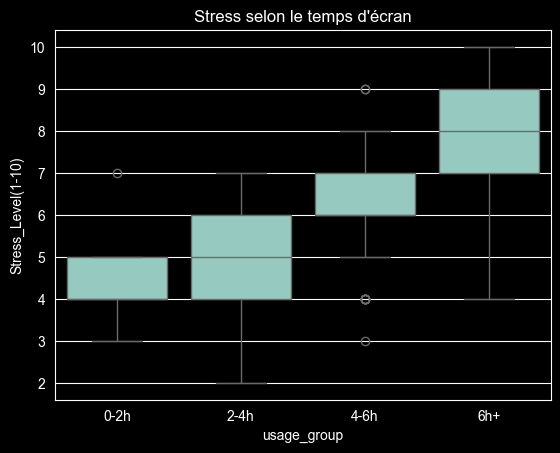

In [26]:
sns.boxplot(
    x="usage_group",
    y="Stress_Level(1-10)",
    data=df,
    order=["0-2h", "2-4h", "4-6h", "6h+"]
)

plt.title("Stress selon le temps d'écran")
plt.show()

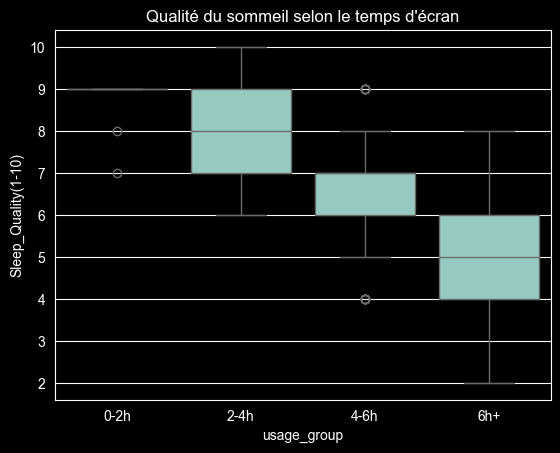

In [28]:
sns.boxplot(
    x="usage_group",
    y="Sleep_Quality(1-10)",
    data=df,
    order=["0-2h", "2-4h", "4-6h", "6h+"]
)
plt.title("Qualité du sommeil selon le temps d'écran")
plt.show()

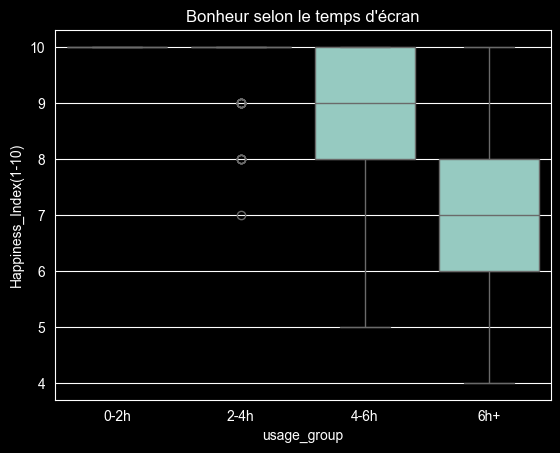

In [30]:
sns.boxplot(
    x="usage_group",
    y="Happiness_Index(1-10)",
    data=df,
    order=["0-2h", "2-4h", "4-6h", "6h+"]
)
plt.title("Bonheur selon le temps d'écran")
plt.show()

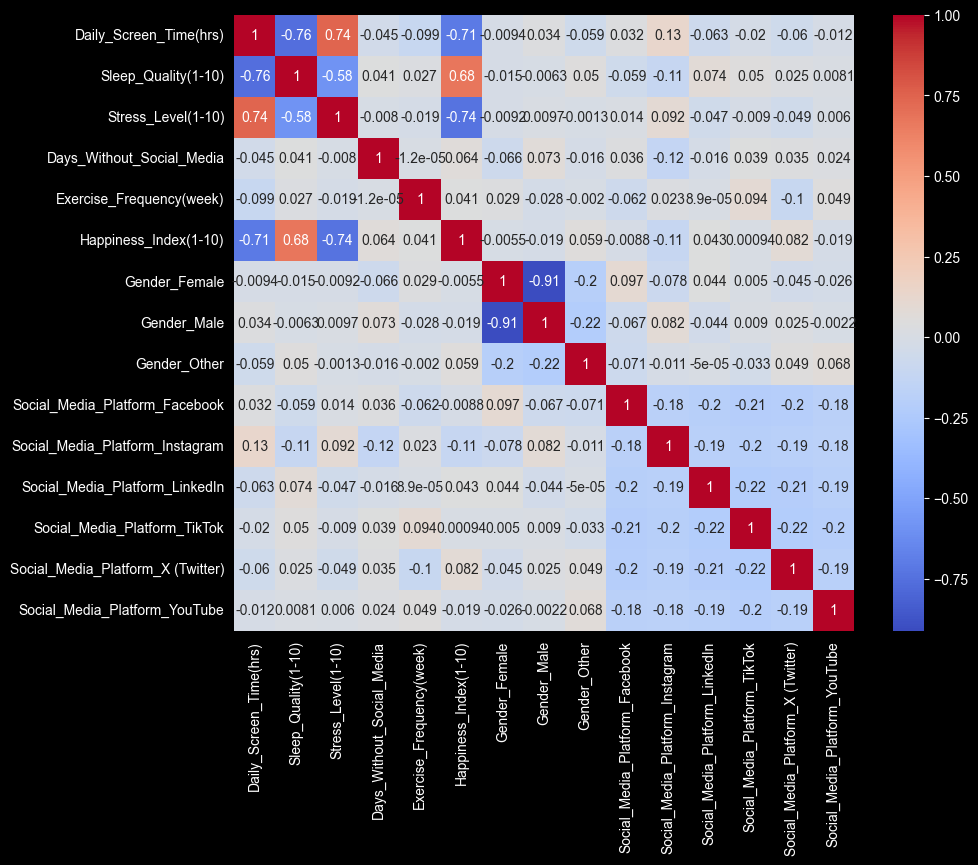

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [33]:
groups = [group["Stress_Level(1-10)"].values for name, group in df.groupby("usage_group")]
stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(159.51470648692916), pvalue=np.float64(2.2567347428757552e-72))

On peut appercevoir que les varriables Stress_Level(1-10), Sleep_Quality(1-10) & Happiness_Index(1-10) sont fortement correlé avec Daily_Screen_Time(hrs)

### ANOVA – Stress

L’analyse de variance (ANOVA) montre une différence statistiquement significative
du niveau de stress entre les groupes de temps d’écran :

F = 159.51
p < 0.001

La p-value extrêmement faible (≈ 0) indique que les différences observées entre les groupes
(0–2h, 2–4h, 4–6h, 6h+) ne sont pas dues au hasard.

On peut donc conclure que le temps d’écran quotidien influence significativement le niveau de stress.

In [34]:
groups = [group["Sleep_Quality(1-10)"].values for name, group in df.groupby("usage_group")]
stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(152.0437219586604), pvalue=np.float64(7.147143325037709e-70))

### ANOVA – Qualité du sommeil

L’ANOVA montre également une différence statistiquement significative
de la qualité du sommeil entre les groupes de temps d’écran :

F = 152.04
p < 0.001

Cela indique que la qualité du sommeil varie significativement
selon le nombre d’heures passées sur les réseaux sociaux.

In [36]:
groups = [group["Happiness_Index(1-10)"].values for name, group in df.groupby("usage_group")]
stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(119.71377811293327), pvalue=np.float64(2.495782257656648e-58))

### ANOVA – Happiness Index

L’analyse de variance montre une différence significative
du niveau de bonheur entre les groupes de temps d’écran :

F = 119.71
p < 0.001

La p-value extrêmement faible indique que le niveau de bonheur
varie significativement selon la durée d’utilisation quotidienne
des réseaux sociaux.

In [38]:
Gender = [
    df["Gender_Male"],
    df["Gender_Female"],
    df["Gender_Other"]
]
sns.boxplot(x="Gender", y="Stress_Level(1-10)", hue="usage_group", data=df)
plt.show()

ValueError: Could not interpret value `Gender` for `x`. An entry with this name does not appear in `data`.